--- ERGEBNISSE DER DCF-ANALYSE ---
Anfangsinvestition:              -100,000.00 CHF
Diskontierungsrate:          8.00%
----------------------------------------
Summe der Barwerte (Gegenwartswert der Einnahmen): 136,679.88 CHF
Kapitalwert (Net Present Value):         36,679.88 CHF
----------------------------------------
Interpretation: Positiver NPV. Die Investition ist voraussichtlich profitabel
und erwirtschaftet mehr als die geforderte Rendite von 8.0%.


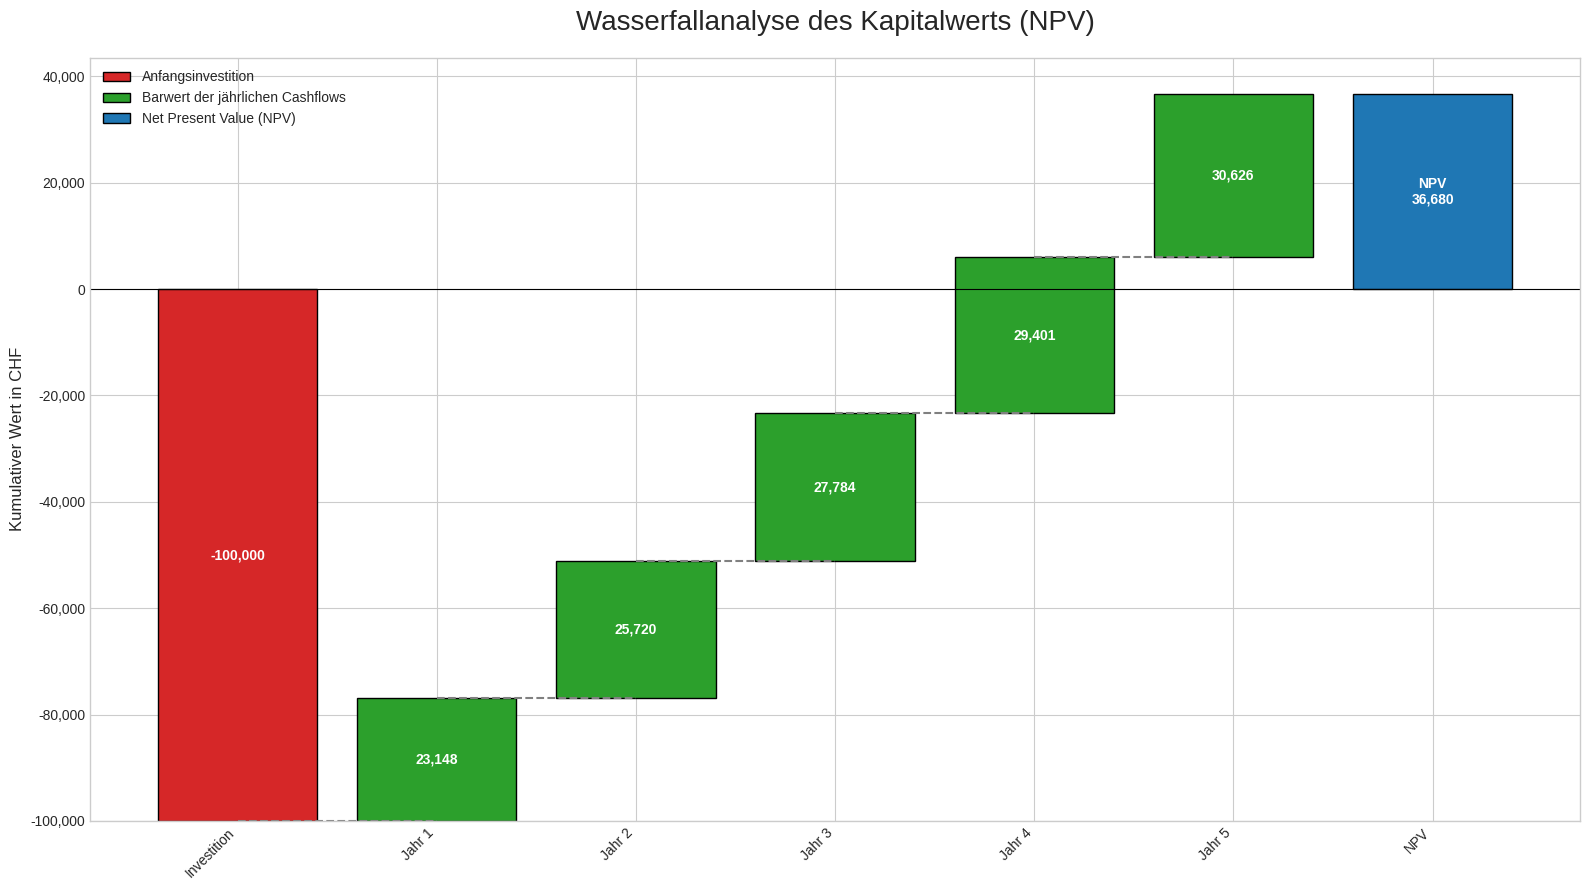

In [3]:
# -*- coding: utf-8 -*-
# Dies ist eine Simulation in einem Python Notebook

# =============== Schritt 1: Import der benötigten Bibliotheken ===============
import matplotlib.pyplot as plt
import numpy as np

# =============== Schritt 2: Definition der Investitions-Parameter ===============
# Hier definieren wir ein fiktives Investitionsprojekt.
# Beispiel: Kauf einer Maschine, die über mehrere Jahre Einnahmen generiert.

investition_initial = -100000  # Anfangsinvestition zum Zeitpunkt 0 (als negativer Wert)
# Erwartete jährliche Cashflows (Einnahmen) für die nächsten Jahre
cashflows_zukunft = [25000, 30000, 35000, 40000, 45000]
diskontierungsrate_prozent = 8.0 # Risiko-angepasster Zinssatz zur Abzinsung (z.B. WACC)

# =============== Schritt 3: Berechnungen vorbereiten ===============
# Die Laufzeit des Projekts ergibt sich aus der Anzahl der zukünftigen Cashflows.
laufzeit_jahre = len(cashflows_zukunft)

# Umwandlung der prozentualen Diskontierungsrate in einen Faktor
diskontierungsfaktor = 1 + (diskontierungsrate_prozent / 100)

# Erstellen einer Liste der Jahre für die Visualisierung (Jahr 0 = Investition, 1, 2, ...)
jahre = np.arange(0, laufzeit_jahre + 1)
# Erstellen der Labels für die x-Achse der Grafik
x_labels = ['Investition'] + [f'Jahr {i+1}' for i in range(laufzeit_jahre)] + ['NPV']


# =============== Schritt 4: Berechnung des Kapitalwerts (Net Present Value - NPV) ===============
# Wir berechnen den heutigen Wert (Barwert) jedes einzelnen zukünftigen Cashflows.

barwerte_cashflows = []
for i, cashflow in enumerate(cashflows_zukunft):
    jahr_aktuell = i + 1
    barwert = cashflow / (diskontierungsfaktor ** jahr_aktuell)
    barwerte_cashflows.append(barwert)

# Der Kapitalwert (NPV) ist die Summe aller Barwerte (inkl. der negativen Anfangsinvestition).
kapitalwert_npv = sum(barwerte_cashflows) + investition_initial


# =============== Schritt 5: Ausgabe der Ergebnisse ===============
print("--- ERGEBNISSE DER DCF-ANALYSE ---")
print(f"Anfangsinvestition:          {investition_initial:15,.2f} CHF")
print(f"Diskontierungsrate:          {diskontierungsrate_prozent:.2f}%")
print("-" * 40)
print(f"Summe der Barwerte (Gegenwartswert der Einnahmen): {sum(barwerte_cashflows):,.2f} CHF")
print(f"Kapitalwert (Net Present Value): {kapitalwert_npv:17,.2f} CHF")
print("-" * 40)

# Interpretation des Ergebnisses
if kapitalwert_npv > 0:
    print("Interpretation: Positiver NPV. Die Investition ist voraussichtlich profitabel\nund erwirtschaftet mehr als die geforderte Rendite von 8.0%.")
elif kapitalwert_npv < 0:
    print("Interpretation: Negativer NPV. Die Investition ist voraussichtlich unprofitabel\nund erreicht nicht die geforderte Rendite von 8.0%.")
else:
    print("Interpretation: NPV ist Null. Die Investition erwirtschaftet genau die geforderte Rendite.")


# =============== Schritt 6: NEUE VISUALISIERUNG - Wasserfalldiagramm ===============
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 9))

# Daten für den Wasserfall vorbereiten
# Wir starten mit der Investition
balken_daten = [investition_initial]
# Hinzufügen der Barwerte der zukünftigen Cashflows
balken_daten.extend(barwerte_cashflows)

# Berechnen der Start- und Endpunkte für die Wasserfall-Balken
bottoms = [0] + list(np.cumsum(balken_daten)[:-1])
tops = list(np.cumsum(balken_daten))
heights = [t - b for t, b in zip(tops, bottoms)]

# Farben für die Balken
farben = ['#d62728'] + ['#2ca02c'] * laufzeit_jahre

# Zeichnen der Wasserfall-Balken
bars = ax.bar(range(len(balken_daten)), heights, bottom=bottoms, color=farben, edgecolor='black')

# Hinzufügen des finalen NPV-Balkens
ax.bar(len(balken_daten), kapitalwert_npv, color='#1f77b4', edgecolor='black')

# Verbindungslinien zwischen den Balken
for i in range(len(tops) - 1):
    ax.plot([i, i+1], [tops[i], tops[i]], linestyle='--', color='gray')

# Titel und Beschriftungen
ax.set_title('Wasserfallanalyse des Kapitalwerts (NPV)', fontsize=20, pad=20)
ax.set_ylabel('Kumulativer Wert in CHF', fontsize=12)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Formatierung der Y-Achse
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.axhline(0, color='black', linewidth=0.8)

# Hinzufügen von Werten auf den Balken
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + bar.get_height()/2,
            f'{bar.get_height():,.0f}', ha='center', va='center', color='white', weight='bold')

# Hinzufügen des NPV-Wertes
ax.text(len(balken_daten), kapitalwert_npv / 2, f'NPV\n{kapitalwert_npv:,.0f}',
        ha='center', va='center', color='white', weight='bold')

# Erstellen einer Legende
from matplotlib.patches import Rectangle
legend_elements = [Rectangle((0,0),1,1, color='#d62728', ec='k'),
                   Rectangle((0,0),1,1, color='#2ca02c', ec='k'),
                   Rectangle((0,0),1,1, color='#1f77b4', ec='k')]
ax.legend(legend_elements, ['Anfangsinvestition', 'Barwert der jährlichen Cashflows', 'Net Present Value (NPV)'], loc='upper left')

plt.tight_layout()
plt.show()
